In [1]:
# Carrega os pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.decomposition
import sklearn.model_selection
import sklearn.neighbors
import sklearn.metrics

In [2]:
# Gera o dataset
digitos = sklearn.datasets.load_digits()

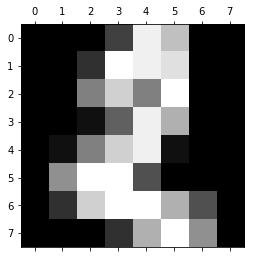

In [3]:
# Plot de um dos itens do dataset
plt.gray() 
plt.matshow(digitos.images[2]) 
plt.show() 

In [4]:
# Gera X e Y
X = digitos.data
Y = digitos.target

In [5]:
# Formato de X e Y
print(X.shape, Y.shape)

(1797, 64) (1797,)


In [6]:
# Cross Validation para gerar os datasets de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = sklearn.model_selection.train_test_split (X, Y, 
                                                                                  test_size = 0.33, 
                                                                                  random_state = 101)

In [7]:
# Normalização dos dados pela Média

# Cálculo da média do dataset de treino
X_norm = np.mean(X_treino, axis = 0)

# Normalização dos dados de treino e de teste
X_treino_norm = X_treino - X_norm
X_teste_norm = X_teste - X_norm

In [8]:
# Shape dos datasets
print(X_treino_norm.shape, X_teste_norm.shape, Y_treino.shape, Y_teste.shape)

(1203, 64) (594, 64) (1203,) (594,)


In [ ]:
# Single Value Decompositon (SVD) - Redução de Dimensionalidade
# Redução de Componentes Linear, similar ao PCA
svd = sklearn.decomposition.TruncatedSVD(n_components = 2)
X_2d = svd.fit_transform(X_treino_norm)

In [ ]:
# Plot dos 2 primeiros Componentes Principais
plt.scatter(X_2d[:,0], X_2d[:,1], c = Y_treino, s = 50, cmap = plt.cm.Paired)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Primeiros 2 Componentes Principais')
plt.show()

In [ ]:
# Função para testar o melhor valor de K
def compute_teste (x_teste, y_teste, clf, cv):
    KFolds = sklearn.model_selection.KFold(n_splits = cv)
    
    scores = []
    
    for i, j in KFolds.split(x_teste):
        test_set = x_teste[j]
        test_labels = y_teste[j]
        scores.append(sklearn.metrics.accuracy_score(test_labels, clf.predict(test_set)))
    return scores

In [ ]:
# Definição de parâmetros
k = np.arange(20) + 1
parametros = {'n_neighbors':k}

In [ ]:
# Construção do Modelo KNN
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
modelo = sklearn.neighbors.KNeighborsClassifier()

In [ ]:
modelo.get_params

In [ ]:
# Grid Search para Cross Validation com o melhor valor de K
modeloKNN = sklearn.model_selection.GridSearchCV(modelo, parametros, cv = 10)

In [ ]:
modeloKNN.get_params

In [ ]:
# Listas vazias que vão receber os scrores de acurária e os parâmetros resultados do modelo
acuracia = []
params = []

In [ ]:
# Lista de dimensões
dimensoes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# Implementação do modelo
for d in dimensoes:
    svd = sklearn.decomposition.TruncatedSVD(n_components = d)
    
    if d < 64:
        X_fit_treino = svd.fit_transform(X_treino)
        X_fit_teste = svd.transform(X_teste)
    else:
        X_nl = X_treino
        X_nl1 = X_teste
        
    modeloKNN.fit(X_fit_treino, Y_treino)
    
    acuracia.append(compute_teste(x_teste = X_fit_teste, y_teste = Y_teste, clf = modeloKNN, cv = 10))
    params.append(modeloKNN.best_params_['n_neighbors'])

In [ ]:
# A acurácia aumenta à medida que usamos mais dimensões para o modelo de classificação
acuracia

## Alterando Parâmetros do Modelo

In [22]:
# Alterando parâmetros do modelo
modelo_v2 = sklearn.neighbors.KNeighborsClassifier(metric = 'hamming')
modeloKNN_v2 = sklearn.model_selection.GridSearchCV(modeloKNN, parametros, cv = 10)

In [23]:
modelo_v2.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')>

In [24]:
# Listas vazias que vão receber os scrores de acurária e os parâmetros resultados do modelo
acuracia = []
params = []

# Lista de dimensões
dimensoes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
# Implementação do modelo
for d in dimensoes:
    svd = sklearn.decomposition.TruncatedSVD(n_components = d)
    
    if d < 64:
        X_fit_treino = svd.fit_transform(X_treino)
        X_fit_teste = svd.transform(X_teste)
    else:
        X_nl = X_treino
        X_nl1 = X_teste
        
    modelo_v2.fit(X_fit_treino, Y_treino)
    
    acuracia.append(compute_teste(x_teste = X_fit_teste, y_teste = Y_teste, clf = modelo_v2, cv = 10))

In [26]:
acuracia

[[0.18333333333333332,
  0.083333333333333329,
  0.13333333333333333,
  0.13333333333333333,
  0.050847457627118647,
  0.084745762711864403,
  0.067796610169491525,
  0.10169491525423729,
  0.084745762711864403,
  0.067796610169491525],
 [0.083333333333333329,
  0.050000000000000003,
  0.13333333333333333,
  0.13333333333333333,
  0.10169491525423729,
  0.050847457627118647,
  0.067796610169491525,
  0.10169491525423729,
  0.067796610169491525,
  0.10169491525423729],
 [0.18333333333333332,
  0.083333333333333329,
  0.13333333333333333,
  0.13333333333333333,
  0.050847457627118647,
  0.084745762711864403,
  0.067796610169491525,
  0.10169491525423729,
  0.084745762711864403,
  0.067796610169491525],
 [0.18333333333333332,
  0.083333333333333329,
  0.13333333333333333,
  0.13333333333333333,
  0.050847457627118647,
  0.084745762711864403,
  0.067796610169491525,
  0.10169491525423729,
  0.084745762711864403,
  0.067796610169491525],
 [0.083333333333333329,
  0.050000000000000003,
  0.1